<a href="https://colab.research.google.com/github/Saba9754/Image-Identification/blob/main/cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Initialize the CNN
model = tf.keras.models.Sequential()

# Define input size
input_size = (128, 128)

# Add the first convolutional layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(*input_size, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(tf.keras.layers.Flatten())

# Add the first fully connected layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
batch_size = 2  # Adjusted batch size for small dataset

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training set
train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/train',
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Create the test set
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Fit the CNN model to the training set and test it on the test set
model.fit(
    train_set,
    steps_per_epoch=train_set.samples // batch_size,
    epochs=30,
    validation_data=test_set,
    validation_steps=test_set.samples // batch_size
)

# List files in the test directory to ensure correct file paths
test_image_dir = '/content/drive/MyDrive/dataset/test'
print("Files in directory:", os.listdir(test_image_dir))

# Update with the correct file name from the directory listing
test_image_path = '/content/cat.02.jpg.png'  # Replace with correct file name

# Check if file exists
if not os.path.exists(test_image_path):
    print(f"File not found: {test_image_path}")
else:
    # Make a prediction on a single image
    test_image = load_img(test_image_path, target_size=input_size)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalize the image

    # Predict
    result = model.predict(test_image)

    # Print the raw output for debugging
    print(f"Raw model output: {result[0][0]}")

    # Interpret the prediction
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'

    print(prediction)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/30
10/10 [==============================] - 6s 451ms/step - loss: 1.5080 - accuracy: 0.4500 - val_loss: 0.7576 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 5s 548ms/step - loss: 0.8375 - accuracy: 0.4500 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/30
10/10 [==============================] - 4s 368ms/step - loss: 0.6844 - accuracy: 0.5500 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 6s 519ms/step - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 5/30
10/10 [==============================] - 4s 411ms/step - loss: 0.6743 - accuracy: 0.5000 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 6/30
10/10 [==============================] - 4s 385ms/step - loss: 0.6869 - accuracy: 0.5500 - val_loss: 0.7177 - val_accuracy: 0.500

**Yolo V8 for image Identification**

In [1]:
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 301.1 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


Saving cat.02.jpg.png to cat.02.jpg.png

0: 416x640 1 cat, 866.0ms
Speed: 12.9ms preprocess, 866.0ms inference, 36.9ms postprocess per image at shape (1, 3, 416, 640)


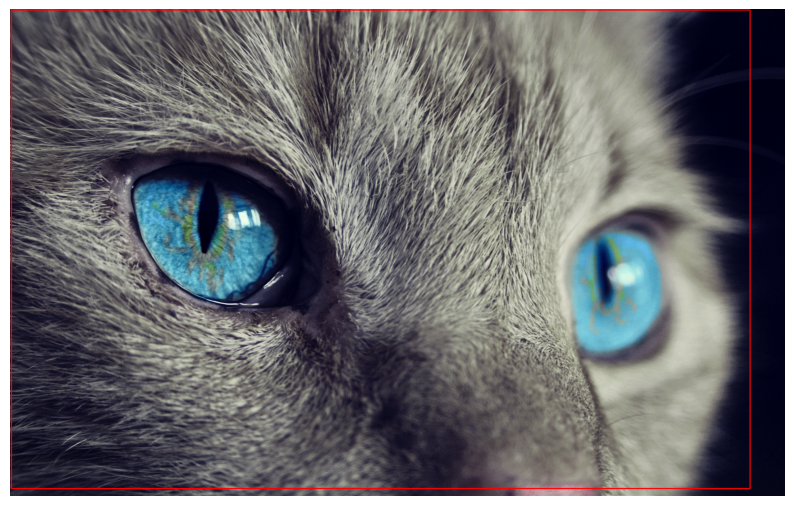

In [2]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Load the YOLOv8 model
model = YOLO('yolov8s.pt')  # You can change to 'yolov8s.pt' for a small version or 'yolov8m.pt' for a medium version


# Upload an image from your PC
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Read the image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run the model on the image
results = model(image)

# Get the detected bounding boxes and labels
boxes = results[0].boxes
labels = results[0].names

# Draw the results on the image
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy.cpu().numpy()[0])
    conf = box.conf.item()
    cls = box.cls.item()
    label = f'{labels[int(cls)]} {conf:.2f}'
    color = (255, 0, 0)  # Red color for bounding boxes
    thickness = 2

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Put the label above the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()